# Machine learning avec les modules Python tensorflow2/keras 

## Entraînement / exploitation d'un réseau de neurones dense dédié à la reconnaissance de chiffres manuscrits

## La banque d'images MNIST

Dans ce TP nous utilisons les images de la banque MNIST disponible sur Internet (http://yann.lecun.com/exdb/mnist/).

La banque MNIST propose 70000 images en ton de gris de 28 $\times$ 28 pixels, correspondant à des matrice de 28 $\times$ 28 d'entiers `uint8` (entiers entre 0 et 255).
Les 70000 images du MNIST sont regoupées en **60000 images d'apprentissage** et **10000 images de test**.<br>
<p style="text-align:center; font-style:italic; font-size:12px;">
<img src="./img/MnistExamples.png" width="500"><br>
[crédit image : Josef Steppan — Travail personnel, CC BY-SA 4.0, commons.wikimedia.org/w/index.php?curid=64810040)]
</p>

# A/ Quelques rappels...

## Le neurone artificiel
C'est une unité de traitement informatique programmée pour calculer la valeur de sa **fonction d'activation** en un point défini par la **combinaison linéaire de ses entrées** $\Sigma_i w_i x_i - b$ :

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/nn_1.png" width="550" ><br>
    [crédit image : JLC]
</p>

L'entrée *Bias* reçoit le stimuli `-1` affecté du poids $b$ permettant de décaler le point où la fonction d'activation ets calculée.

## Fonction d'activation

Principaux rôles des fonctions d'activation des neurones artificiels :

- introdure dans le neurone artificiel un comportement **non linéaire** comme des mécanismes de seuil, de saturation...
- fixer la plage de sortie de la valeur calculée par le neurone, par exemple sortie dans l'intervalle $[-1 ; 1]$, ou $[0 ; +\infty[$

Exemples de fonction d'activation couramment utilisées :<br />
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/activationFunctions.png" width="850"><br>
    [crédit image : JLC]
</p>

# B/ Structure du premier réseau à construire 
Dans ce premier TP,  nous allons construire un **réseau dense**, avec :
- une **couche d'entrée** de 784 valeurs comprises entre 0 et 1 (les pixels de l'image 28 $\times$ 28 mis sous forme d'un vecteur de 784 valeurs),
- une **couche cachée** de 784 neurones utilisant la fonction d'activation `relu`,
- une **couche de sortie** à 10 neurones, pour la classification des images en 10 classes associées aux chiffres {0,1,2...9}, utilisant la fonction d'activation `softmax` adaptée aux traitements de classification.

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/archiReseau.png" alt="archiReseau.png" style="width: 900px;"><br> 
    [crédit image : JLC]
</p>

Remarques : 
- Chaque neurone de la première couche cachée reçoit 785 entrées : les 784 valeurs $x_i$ des pixels de l'image plus le biais (l'entrée '-1'). 
- Il y a donc 785 inconnues pour chaque neurone : les 784 poids $w_i$ affectés à chaque entrée $x_i$, plus le  poids $b$ affecté aux biais.
- $\leadsto$ on compte donc 785 $\times$ 784 inconnues pour la couche cachée et 785 $\times$ 10 inconnues pour la couche de sortie : soit un total de 623290 inconnues dont la valeur doit être optimisée par l'algorithme d'apprentissage du réseau.

Un algorithme de **retropropagation de l'erreur** entre valeur attendue et valeur prédite par le réseau permet de modifier les valeurs des poids des différentes couches pour minimiser l'erreur. Au fur et à mesure des apprentissages successifs, cette modification des poids du réseau de neurones tend vers un état qui constitue le réseau entraîné.

La fonction d'activation `softmax` utilisée pour les 10 neurones de la couche de sortie permet de "faire ressortir" la sortie $y_i$ de valeur la plus grande : `softmax` donne une valeur très proche de 1 pour le neurone fournissant la plus grande valeur $y_i$, alors que pour tous les autres neurones, la valeur calculée par `softmax` sera proche de zero.


<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/softmax.png" width="350"><br>
    [crédit image : JLC]
</p>

#  B/ Environnement Python de travail

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:large"> 
    Le travail sous Python proposé dans ce TP gagne à être fait dans un <span style="font-weight:bold;">environnement Python3 dédié</span> : voir le document <span style="font-style:italic">EnvironnementPython_tf2.pdf</span> si vous n'avez pas encore créé d'environnement Python dédié pour le travail avec les modules Keras et tensorflow.
</span>
</div>

Vérification des versions des modules Python :
- Python     : doit être >= 3.6
- tensorflow : doit être >= 2.1.0
- tf.keras   : doit être 2.2.4-tf
- OpenCV     : doit être 3.4.x

La documentation (en anglais) du module tf.keras est ici : https://www.tensorflow.org/api_docs/python/tf/keras.

In [3]:
import tensorflow as tf
import sys, cv2
print(f"Version de Python    : {sys.version.split()[0]}")
print(f"Version, de Keras    : {tf.keras.__version__}")
print(f"Version de tensorflow: {tf.__version__}")
print(f"Version, de OpenCV   : {cv2.__version__}")

Version de Python    : 3.8.5
Version, de Keras    : 2.4.0
Version de tensorflow: 2.4.0
Version, de OpenCV   : 4.2.0


Incrustation des tracés matplotlib dans le cahier IPython et import de modules utiles :

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# C/ Travail à faire

# 1 - Récupération du jeu de données MNIST

In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist
(im_train, lab_train), (im_test, lab_test) = mnist.load_data() 

<span style="color:blue;font-family:arial">Faire afficher les attributs `shape` et `dtype` des tableaux `im_train`, `lab_train`, `im_test` et `lab_test` -> interpréter les réponses :</span>

In [8]:
im_train.shape, im_train.dtype, lab_train.shape, lab_train.dtype, 

((60000, 28, 28), dtype('uint8'), (60000,), dtype('uint8'))

In [9]:
im_test.shape, im_test.dtype, lab_test.shape, lab_test.dtype, 

((10000, 28, 28), dtype('uint8'), (10000,), dtype('uint8'))

## Visualisation des images et des étiquettes :

<span style="color:blue;font-family:arial;">Avec la fonction `imshow` du module `matplotlib.pyplot` faire afficher en tons de gris la 601-ème image du tableau `image_train`.<br><br>
Indications :<br>
- utiliser `plt.figure(figsize=(2,2))` pour fixer la taille de l'image ;<br />
- passer l'option `cmap='gray'` à la fonction `imshow` ;
- enlever les graduations en X et Y avec l'instruction  `plt.xticks([]); plt.yticks([])`.</span>

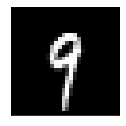

In [13]:
plt.figure(figsize=(2,2))
plt.imshow(im_train[600], cmap='gray')
plt.xticks([]); plt.yticks([]);

Vérifier que l'étiquette associée à `image_train[600]` correspond bien à ce qu'on voir sur l'image....

In [15]:
lab_train[600]

9

Écrire une fonction `plot_image` d'arguments `r, L, C` qui affiche les images MNIST commençant au rang `r` dans une grille de `L` lignes et `C` colonnes.<br><bR>
*Indications* : utiliser `plt.subplot(L,C,n)` pour poistionner le nième tracé dans la grille L x C. La figure affichée aura les dimensions 10 x 10 pouces.

In [18]:
def plot_image(r,L,C):
    plt.figure(figsize=(10,10))
    for i in range(L*C):
        plt.subplot(L, C, i+1)
        plt.imshow(im_train[r+i],cmap='gray', interpolation='none')
        plt.xticks([]); plt.yticks([])

<span style="color:blue;font-family:arial">Fait afficher 100 images à partir de la 601 ème dans une grille de 10x10 : </span>

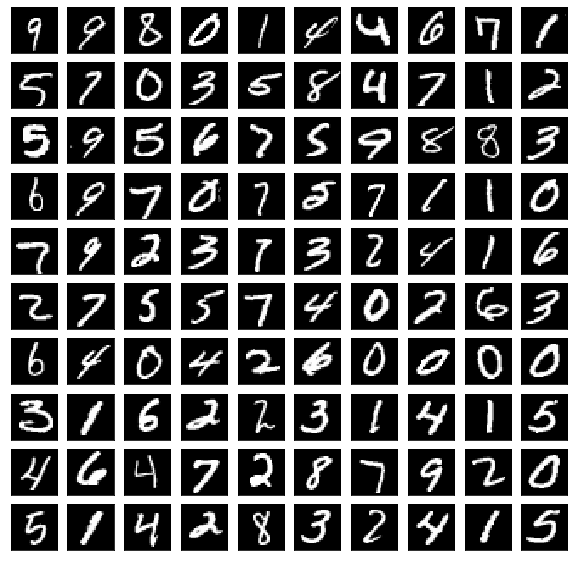

In [19]:
plot_image(600, 10, 10)

# 2 - Pré-traitement des données

Pour adapter les données au réseau de neurones, on va transformer les matrice d'entiers `uint8` représentant les images 28 x 28 pixels en vecteurs **normalisés** $(V_i)_{i=0..783}$ de 784 valeurs réelles $V_i$  avec $ 0 \leqslant V_i \leqslant 1.$<br />

*Nota* : une autre façon de faire consisterait à garder les matrices d'entiers en utilisant l'option de du module **keras** qui permet de dire que la couche d'entrée est constituée de matrices (cf le TP2 qui met en oeuvre un réseau convolutionnel).

## 2.1 - Transformation des matrices d'entrée en vecteurs normalisés :

Pour paramétrer la construction du réseau, il faut récupèrer :

- le nombre d'images d'entraînement et de test dnas les variables,
- le nombre de pixels des images

In [20]:
nb_im_train = im_train.shape[0]
nb_im_test  = im_test.shape[0]
nb_pixels   = im_train[0].size        # normalement : 28 x 28 = 784 pixels


In [21]:
print(f"{nb_im_train} images d'entrainement et {nb_im_test} images de test")
print(f"{nb_pixels} pixels dans chaque image")


60000 images d'entrainement et 10000 images de test
784 pixels dans chaque image


Définir les tableaux `x_train` et 'y_train` contenant les matrices des tableaux `im_train` et `im_test` *mise à plat* avec conversion en `float` :<br>
*indications* : on pourra utiliser les méthodes `reshape` et `astype('float32')` des tableaux ndarray :

In [25]:
x_train = im_train.reshape((nb_im_train, nb_pixels)).astype('float32')
x_test  = im_test.reshape((nb_im_test, nb_pixels)).astype('float32')

Vérifier que les dimensions des tableaux `x_train` et `x_test` sont bien celles attendues :

In [26]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Normaliser les vecteurs des tableaux x_train et x_test :

In [27]:
x_train = x_train/255
x_test  = x_test/255

<span style="color:blue;font-family:arial">Vérifie les valeurs min et max des tableaux `x_train` et `x_test`  :</span>

In [28]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [29]:
x_test.min(), x_test.max()

(0.0, 1.0)

## 2.2 - *Hot coding* des labels :

Les labels des images sont des valeurs entières comprises entre 0 et 9. <br>
Pour traiter efficacement le problème de classification, on utilise la technique de *hot coding* qui remplace les valeurs des classes par un vecteur avec autant d'éléments 0 ou 1 que de classes à choisir.<br />
Pour nore exemple de 10 classes correspondant aux labels '0' à '9' :
- le label `0` correspond au vecteur `[1 0 0 0 0 0 0 0 0 0]`.
- le label `3` correspond au vecteur `[0 0 0 1 0 0 0 0 0 0]`.
- le label `9` correspond au vecteur `[0 0 0 0 0 0 0 0 0 1]`.

La fonction `to_categorical` du module `tensorflow.keras.utils` permet de faire cette transformation :

In [30]:
from tensorflow.keras.utils import to_categorical
# 'hot encoding' des sorties :
y_train = to_categorical(lab_train)
y_test  = to_categorical(lab_test)

Visauliser les 10 premières valeurs de `lab_train` et les valeurs `hot encoded` de `y_train` correspondantes :

In [32]:
lab_train[:10], y_train[:10]

(array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8),
 array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))

# 3 - Construction du réseau de neurones :

On va maintenant construire un réseau de neurones **séquentiel** (cf https://www.tensorflow.org/api_docs/python/tf/keras/Sequential ) en **4 lignes** Python à l'aide du module **keras** (inclus dans **tensorflow** depuis la version 2) qui permet une manipulation de haut niveau des outils proposés par le module **tensorflow**.<br />

Les spécifications du réseau de neurones à construire sont :
- les entrées sont constituées des 784 pixels, mis sous forme d'un vecteur normalisé ;
- le réseau de neurones comporte une première couche de 784 neurones utilisant la fonction d'activation `relu` (*retified linear unit*, voir https://keras.io/activations) ;
- la couche de sortie comporte 10 neurones utilisant la fonction d'activation `softmax` pour convertir les sorties en valeur de probalibilités permettant de choisir une des 10 classes ;
- La **fonction d'erreur** (*loss function*) utilisée pour mesurer l'erreur entre étiquette et valeur prédite par le réseau est de type `Logarithmic loss`. Dans Keras elle correspond à la *loss function* `categorical_crossentropy` :
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="./img/CrossEntropy.png" width=550><br>
    (crédit image : vidéo "Deep Learning TensorFlow" de Martin Gorner)
</p>
- l'algorithme de descente de gradient ADAM est utilisé pour l'optimisation des poids des neurones par rétro-progation de l'erreur. 

### Rendre les tirages aléatoires reproductibles

Les poids d'un réseau de neurones sont initialisés par tirage aléatoire. <br>
Lorsqu'on invoque plusieurs fois de suite des générateurs aléatoires comme `numpy.random.rand` par exemple, on constate qu'à chaque invocation, on obtient une suite de valeurs aléatoires différentes :

In [33]:
print(np.random.rand(5))
print(np.random.rand(5))

[0.79177112 0.08569113 0.40489941 0.90702463 0.00569837]
[0.31586681 0.26160538 0.40902182 0.14756939 0.41561998]


In [34]:
print(np.random.rand(5))
print(np.random.rand(5))

[0.24514497 0.92168602 0.50668251 0.42291048 0.00992158]
[0.76398978 0.17391955 0.47653145 0.38101329 0.37476005]


Ceci peut présenter un problème car les poids d'un réseau de neurones sont initialisés aléatoirement à la construction du réseau : à chaque fois qu'on relance la cellule ou le notebook on obtient un état initial du réseau différent conduisant à un résultat de réseau entraîné différent, ce qui est gênant quand on veut étudier les performances du réseau entraîné en focntion de ses paramètres de construction par exemple...

Pour éviter ce comportement, on peut fixer la **graine** (*seed*) des générateurs aléatoires de façon à produire des suites de nombres aléatoires **reproductibles**.<br>
Les cellules suivantes illustrent le procédé :

In [38]:
seed = 43

In [39]:
np.random.seed(seed)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

In [40]:
np.random.seed(seed)
np.random.rand(5)

array([0.11505457, 0.60906654, 0.13339096, 0.24058962, 0.32713906])

## Construction du réseau de neurones dense 

In [42]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

nb_classes = 10
np.random.seed(43)

# les 4 lignes pour construire le réseau de neurones:
model = Sequential()
model.add(Dense(nb_pixels, input_dim=nb_pixels, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Avec la méthode `summary` de l'objet `model`, faire afficher la description du modèle : retrouver les valeurs des paramètres...

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


<span style="color:blue;font-family:arial">Peux-tu retrouver le nombre total de paramètres avec une formule simple ?</span>

In [45]:
785*784+785*10

623290

### Sauvegarder l'état initial du  réseau

On peut sauvegarder l'état initial des poids du réseau non-entraîné (valeurs aléatoires) avec la méthode `Model.save_weights`. <br>
Ce sera utile plus loin pour remettre le réseau à son état initial avant de relancer d'autres entraînements :

In [46]:
import os
if not os.path.exists("weights"): os.mkdir("weights")
model.save_weights('weights/initial')
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith("initial")]
for f in files: print(f)

weights/initial.data-00000-of-00001
weights/initial.index


Attention : on donne le nom `"initial"` mais la méthode `Model.save_weights` l'utilise pour créer plusieurs fichiers préfixés par `"initial"`.<br>
Lors de la lecture ultérieure des poids du réseau avec la méthode `Model.load_weights` il suffira de donner le même nom pour que cela fonctionne.

# 4 - Entraînement du réseau :

Le modèle est entraîné sur les $60\,000$ images :
- en utilisant :
    - les données d'entrée `x_train` (images)
    - les données de sortie `y_train` (labels).
- un certain nombre de fois de suite donné par le paramètre `epochs`, 
- avec mises à jour des poids (*back propagation*) toutes les 200 images (paramètre `batch_size`)

In [47]:
# au cas on on exécuterait plusieurs fois cette cellule, il faut 
# prendre soin de bien de ré-initialiser les poids du réseau à leur valeurs aléatoires...
model.load_weights("weights/initial") 

hist = model.fit(x_train, y_train, 
                 epochs=5, 
                 batch_size=200, 
                 verbose=1)

Epoch 1/5
300/300 [==============================] - 6s 19ms/step - loss: 0.4812 - accuracy: 0.8667
Epoch 2/5
300/300 [==============================] - 5s 18ms/step - loss: 0.1231 - accuracy: 0.9662
Epoch 3/5
300/300 [==============================] - 5s 18ms/step - loss: 0.0741 - accuracy: 0.9791
Epoch 4/5
300/300 [==============================] - 6s 19ms/step - loss: 0.0501 - accuracy: 0.9861
Epoch 5/5
300/300 [==============================] - 5s 18ms/step - loss: 0.0354 - accuracy: 0.9909


le résultat `hist` est un objet de type `tensorflow.python.keras.callbacks.History`, qui possède un attribut `history` de type `dict`, avec les clefs `loss` et `accuracy`

In [48]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [49]:
hist.history['loss']

[0.27491891384124756,
 0.10953249782323837,
 0.07078912109136581,
 0.05146937817335129,
 0.03699653595685959]

### Tracé des courbes `accuracy` et `loss` :

La fonction `plot` du module `utils` permet de tracer les courbes de précision et de perte en utilisant les données stockées dans l'objet `hist` :

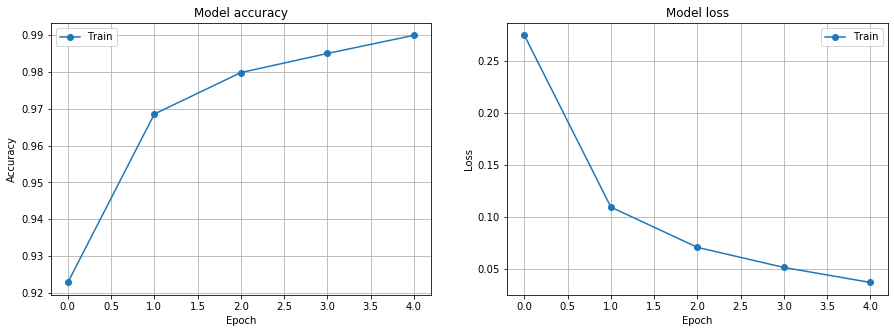

In [54]:
from utils import plot
plot(hist)

On peut penser qu'augmenter le nombre d'`epochs` peut permettre d'aumengenter les performances du réseau... mais en fait on court le risque de sur-entraînner le réseau (*over-fit*)

## 4.1 - Entraînement du réseau avec tests pendant l'entraînement

Pour avoir un meilleur indicateur sur la qualité de l'entraînement du réseau, il est intéressant de tester à chaque `epoch` la précison du réseau entraîné en utilisant les données de test. Ceci permet d'avoir une meilleur évaluation de l'évolution de la précision du réseau calculée avec les données du test (clef `val_accuracy`) :

In [55]:
model.load_weights("weights/initial")

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test), # jeu de données qui sera utilé à la fin de cheque epoch
                 epochs=10, 
                 batch_size=200, 
                 verbose=1)

Epoch 1/10
300/300 [==============================] - 7s 23ms/step - loss: 0.2417 - accuracy: 0.9299 - val_loss: 0.1173 - val_accuracy: 0.9661
Epoch 2/10
300/300 [==============================] - 6s 21ms/step - loss: 0.0957 - accuracy: 0.9716 - val_loss: 0.0839 - val_accuracy: 0.9746
Epoch 3/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0607 - accuracy: 0.9823 - val_loss: 0.0698 - val_accuracy: 0.9789
Epoch 4/10
300/300 [==============================] - 6s 21ms/step - loss: 0.0434 - accuracy: 0.9880 - val_loss: 0.0725 - val_accuracy: 0.9756
Epoch 5/10
300/300 [==============================] - 7s 23ms/step - loss: 0.0325 - accuracy: 0.9909 - val_loss: 0.0570 - val_accuracy: 0.9828
Epoch 6/10
300/300 [==============================] - 7s 23ms/step - loss: 0.0231 - accuracy: 0.9941 - val_loss: 0.0621 - val_accuracy: 0.9814
Epoch 7/10
300/300 [==============================] - 7s 24ms/step - loss: 0.0170 - accuracy: 0.9961 - val_loss: 0.0586 - val_accuracy: 0.9818

On a cette fois non seulement les valeurs `loss` et `accuracy` mais aussi `val_loss` et `val_accuracy` calculées en faisant tourner le réseau à chaque `epoch` avec les données de test :

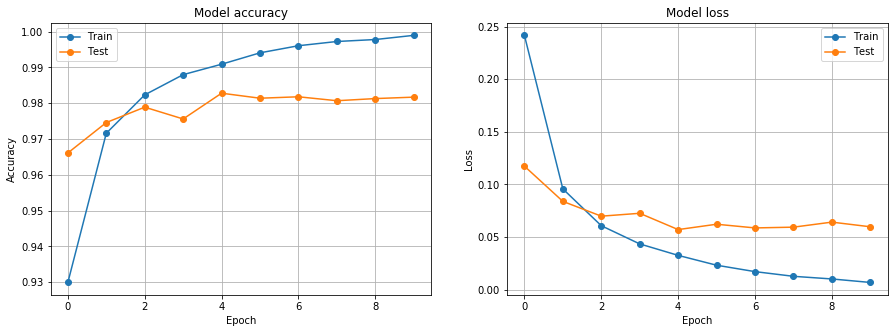

In [56]:
plot(hist)

On voit clairement que la précision calculée avec les données de Test tend vers une limite voisine de 0.98 . <br />
Les performances du réseau peuvent même se dégrader si on continue l'entraînement (phénomène connu sous le nom de sur-apprentissage (aka *over fiting*).

### Arrêter l'entrainement avant l'*over-fit*

Keras propose des mécanisme permettant d'arrêter automatiquement l'apprentissage en surveillant par exemple la croissance de la précision d'une `epoch` à l'autre.<br>
Ce point est traité dans le notebook <a href="TP1_MNIST_dense_overfit.ipynb"> TP1_MNIST_dense_overfit.ipynb </a >

### Sauvegarder les poids du  réseau entraîné

La méthode `Model.save_weights` permet d'enregistrer les **poids** du réseau entraïné dans un fichier :

In [57]:
import os
if not os.path.exists("weights"): os.mkdir("weights")
model.save_weights('weights/check_points')
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith("check")]
for f in files: print(f)

weights/checkpoint
weights/check_points.data-00000-of-00001
weights/check_points.index


### Sauvegarder la strucure du réseau et ses poids

La méthode `Model.save` permet d'enregistrer **toute la structure et les poids** du réseau entraïné dans un fichier.<br />
Ceci permet de recréer plus tard *from scratch* le réseau entrainé pour passer en phase exploitation du réseau par exemple, en utilisant la fonction`tf.keras.models.load_model` :

In [58]:
import os
if not os.path.exists("models"): os.mkdir("models")
model.save('models/model1') 
files=[os.path.join("models",f) for f in os.listdir("models") if f.startswith("model")]
for f in files: print(f)

INFO:tensorflow:Assets written to: models/model1/assets
models/model1


# 5/ Vérication de l'apprentissage avec le jeu de test

La méthode `predict` permet de demander au modèle sa prédiction pour une ou plusieurs entrées.<BR />
Exemple de prédition pour une image test numéro i dans le jeu d'images de test (0 <= i <= 10000) :

valeur trouvée par le réseau de neurones pour la 1000ème image :
	[0.0000 0.0000 0.0000 0.0023 0.0000 0.0000 0.0000 0.0009 0.0000 0.9967]

valeur arrondie à 1 chiffre : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
rep[0].argmax() donne : 9

La bonne réponse est 9, soit en 'hot coded' : [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]


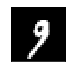

In [61]:
i = 1000
rep = model.predict(x_test[i:i+1])

np.set_printoptions(formatter={'float':'{:0.4f}'.format})
print(f"valeur trouvée par le réseau de neurones pour la {i}ème image :\n\t{rep[0]}\n")

np.set_printoptions(formatter={'float':'{:0.1f}'.format})
print(f"valeur arrondie à 1 chiffre : {rep[0]}")
print(f"rep[0].argmax() donne : {rep[0].argmax()}")

plt.figure(figsize=(1,1))
digit = im_test[i]
plt.imshow(digit, cmap='gray');
plt.xticks([]); plt.yticks([])

print(f"\nLa bonne réponse est {lab_test[i]}, soit en 'hot coded' : {y_test[i]}")

<span style="color:blue;font-family:arial">Écrire les instructions Python pour calculer avec les données de test le pourcentage d'erreur du réseau entrainé.... <br/> 
Conseil: la variable rep contient pour chaque image une liste de 10 probabilités, il pourra être utile d'utiliser la fonction `argmax` de la librairie numpy pour obtenir le chiffre de plus haute probabilité.</span>


In [62]:
results = model.predict(x_test)
bonne_rep = 0
for i, res in enumerate(results):
    bonne_rep += (np.argmax(res) == lab_test[i])
print(f"taux de réussite : {bonne_rep/len(x_test)*100:.2f} %")

taux de réussite : 98.17 %


### 5.1 - Afficher la matrice de confusion

La cellule suivante affiche la **matrice de confusion** en utilisant les modules `sklearn` et `seaborn` :

False predictions: 183/10000
Pred: [2 7 3 0 8 2 2 8 8 1 3 4 8 9 4 2 0 5 2 6 8 8 2 4 9 5 3 9 3 3 4 3 9 7 6 6 7
 2 2 4 4 0 9 3 8 9 0 7 0 1 8 8 0 0 8 1 8 4 4 5 3 8 0 1 4 4 7 3 2 5 5 3 2 9
 0 1 4 0 4 2 8 8 8 3 4 1 2 4 6 3 3 2 5 4 8 1 2 3 7 9 7 8 7 5 4 7 1 5 5 8 3
 4 4 4 8 6 8 8 2 7 9 3 8 3 8 9 9 9 9 9 8 9 9 6 1 7 5 4 8 9 6 4 6 8 8 2 8 8
 8 8 8 8 8 8 8 9 4 6 3 6 9 2 2 2 8 4 8 7 7 3 7 8 6 8 0 6 0 0 7 4 8 3 8]
Real: [4 2 5 6 9 8 8 2 1 2 7 8 5 8 5 1 6 6 7 4 7 6 7 9 4 9 8 7 5 2 6 7 7 8 4 2 3
 0 7 6 9 2 0 5 4 4 2 3 6 6 0 5 8 9 5 9 9 9 2 9 5 7 9 6 9 9 4 7 3 9 3 9 1 5
 6 9 6 5 8 7 5 2 7 2 0 7 6 9 5 5 1 4 3 9 9 7 0 9 2 7 1 2 2 9 9 8 9 6 3 9 8
 6 9 2 0 1 1 1 4 3 4 5 3 5 3 5 5 3 3 3 3 3 8 2 7 0 9 8 0 8 1 6 0 4 1 3 1 1
 1 1 1 1 5 2 2 3 6 0 7 8 4 7 7 7 1 9 0 2 4 6 9 2 5 3 4 5 2 5 4 9 2 2 6]


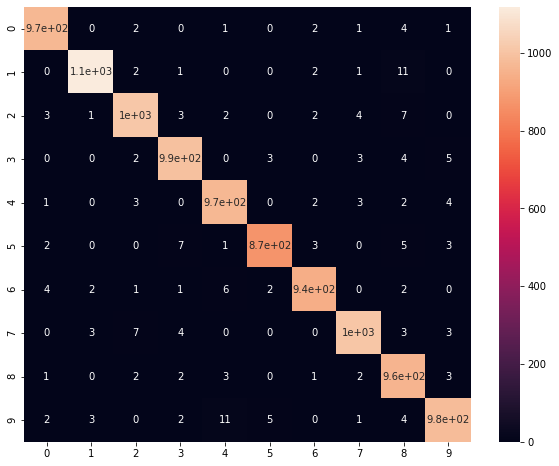

In [63]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix

classes   = np.array([0,1,2,3,4,5,6,7,8,9])
predicted = model.predict_classes(x_test)
target    = np.argmax(y_test, axis=1)

fail = [x != y for x,y in zip(predicted, target)]
print("False predictions: %d/%d" % (np.sum(fail), len(results)))
print("Pred:", predicted[fail])   # print only predicted[True] skipping predicted[False]
print("Real:", target[fail])

cm = confusion_matrix(target,predicted)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(10,8))
sn.heatmap(df_cm, annot=True)
plt.show()

# 6/ Évolution du réseau : augmentation du nombre de couches cahées 

On peut essayer de construire un réseau avec plus de couches. Par exemple :
- couche d'entrée avec les 784 pixels
- couche cachée 1 : 784 neurones, fonction d'activation `relu`
- couche cachée 2 : 300 neurones, fonction d'activation `relu`
- couche cachée 3 : 100 neurones, fonction d'activation `relu`    
- couche de sortie : 10 neurone, fonction d'activation `softmax`.

<span style="color:blue;font-family:arial">Peux-tu construire le réseau `model2` correspondant avec Keras ?</span>

In [ ]:
np.random.seed(43)
model2 = Sequential()
model2.add(Dense(784, input_dim=784, activation='relu'))
model2.add(Dense(300, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<span style="color:blue;font-family:arial">Avec la méthode `summary` de l'objet `model2`, fait afficher la description du modèle : expliquer les valeurs des paramètres ?</span>

In [ ]:
model2.summary()

`plot_model` permet de dessiner la structure du réseau :

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

<span style="color:blue;font-family:arial">Entraînne le réseau `model2` avec les mêmes données que `model`, et fait tracer les courbes de précission et d'erreur :</span>

In [ ]:
hist2 = model2.fit(x_train, y_train, 
                   validation_data=(x_test, y_test), 
                   epochs=10, 
                   batch_size=200, 
                   verbose=1)

In [ ]:
plot(hist2)

<span style="color:blue;font-family:arial"> Augmenter le nombre de couches a t'il un impact sur les performances du réseau ?<br />
Que peut on conclure sur l'utilité de complexifier ce type de réseau ? </span>

Double-clic ici pour inscrire ta réponse : pas vraimment => ce n'est pas utile de complexifier le réseau.

# 7/ Utiliser le réseau avec ses propres images

On va utiliser le réseau entrainé pour voir comment il réagit avec des chiffres "écrits à la main" différents des chiffres de la banque MNIST...<br />
Pour cela on utilise les images du dossier `chiffres` :

In [ ]:
import os
images = ['chiffres/'+f for f in os.listdir('chiffres') if f.endswith(".png")]
images.sort()
print("Images du dossier 'chiffres' :")
for im in images: print(im)

### Lecture des fichiers image avec openCV

In [ ]:
import cv2
# lecture des images -> matrices ndarray 28x28 
input_data = [255-cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2GRAY) for image in images]
input_data = np.array(input_data)
input_data.shape, input_data.dtype  # on doit avoir 10 matrices de 28 x 28 valeurs 

#### Visualistion des images :

In [ ]:
plt.figure(figsize=(15,5))
for i,M in enumerate(input_data):  
    plt.subplot(1,12,i+1)
    plt.imshow(input_data[i], cmap='gray', interpolation='none');
    plt.xticks([]); plt.yticks([])

transformation des matrices 28x28 en vecteurs de float normalisés :

In [ ]:
nb_images = input_data.shape[0]
# mise 'à plat' des matrices sous forme de vecteurs de floats :
x_photo = input_data.reshape(nb_images, 28*28).astype('float32')
# normalisation des données :
x_photo /= 255

prédiction du réseau entrainé, avec les images perso :

In [ ]:
np.set_printoptions(formatter={'float': '{:0.2f}'.format})  # demander à numpy d'afficher 2 décimales

rep = model.predict(x_photo)
print(rep)

In [ ]:
[r.argmax() for r in rep]

In [ ]:
for r in rep:
    print(f"{r.argmax()} avec la probablilité {r.max():.2f}")

In [ ]:
classes = np.array([0,1,2,3,4,5,6,7,8,9])

predicted = np.array([r.argmax() for r in rep])
target    = np.array([0,1,2,3,4,5,6,7,8,9])

fail = [x != y for x,y in zip(predicted, target)]
print("False predictions: %d/%d" % (np.sum(fail), len(predicted)))
print("Pred:", predicted[fail])   # print only predicted[True] skipping predicted[False]
print("Real:", target[fail])

cm = confusion_matrix(target,predicted)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(8,6))
sn.heatmap(df_cm, annot=True)
plt.show()

Avec le deuxième réseau dense :

In [ ]:
rep = model2.predict(x_photo)
print(rep)

In [ ]:
[r.argmax() for r in rep]

In [ ]:
for r in rep:
    print(f"{r.argmax()} avec la probablilité {r.max():.2f}")

In [ ]:
classes = np.array([0,1,2,3,4,5,6,7,8,9])

predicted = np.array([r.argmax() for r in rep])
target    = np.array([0,1,2,3,4,5,6,7,8,9])

fail = [x != y for x,y in zip(predicted, target)]
print("False predictions: %d/%d" % (np.sum(fail), len(predicted)))
print("Pred:", predicted[fail])   # print only predicted[True] skipping predicted[False]
print("Real:", target[fail])

cm = confusion_matrix(target,predicted)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(8,6))
sn.heatmap(df_cm, annot=True)
plt.show()

beaucoup mieux ?

Les résultats montrent :
- que le réseau à 1 seule couche cachée et à 2 couches cachées donnent des performances proches pour les images MNIST,
- que l'apprentissage d'un réseau dense reste assez sensible à la nature du jeu de données : les images de chiffres faites 'maison' ne ressemblent pas tout à fait à celles de la banque MNIST, d'où des erreurs de classification avec un simple réseau dense.

# La suite....

Pour aller au-delà des 98% de reconnaissance des chiffres, il faut passer à une autre architecture de réseau plus adaptée au traitement des images : les réseaux **convolutionnels**, traités dans le prochain cahier IPython `TP2_MNIST_convol.ipynb`.

# Autres ressources intéressantes... des vidéos :

In [64]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [1]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [3]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>